# Imports

In [4]:

from tqdm import tqdm
from collections import defaultdict
import pandas as pd
import pprint as pp
from IPython.display import display
import torch
import pickle
import random
from pathlib import Path 
import json
import re
from collections import defaultdict
from scipy.stats import entropy
import ast
from collections import defaultdict
import importlib
import torch
import os
from pathlib import Path
from datetime import datetime
import json
import torch
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
)
from modules.DataPreprocesser import DataPreprocesser
from modules import CorpusUtils as corp
#Convokit Imports
from convokit.forecaster.CRAFTModel import CRAFTModel
from convokit.forecaster.forecaster import Forecaster
from convokit import download, Corpus
from convokit import Corpus, Speaker, Utterance, Conversation
from functools import partial
from convokit.convokitConfig import ConvoKitConfig

In [203]:
downpath =Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/downsampled_run/corpus_kodis_ground_downsampled")
defaultpath =Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/nosampling_run/corpus_kodis_ground_default")
weights_path = Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/weighted_run/corpus_kodis_ground_weighted_loss")

corpus_down = Corpus(filename=downpath)
corpus_default = Corpus(filename=defaultpath)
corpus_weighted = Corpus(filename=weights_path)

# Comparison of Metrics for all Model variants using Best Threshhold
- test set: Ground Kodis Corpus (all utterances)

In [23]:
%%capture
ground_thresholds, ground_metrics, ground_corpora = compare_craft_models(corpora_info_ground)
no_last_thresholds, no_last_metrics, no_last_corpora = compare_craft_models(corpora_info_no_last)
no_subm_thresholds, no_subm_metrics, no_subm_corpora = compare_craft_models(corpora_info_no_subm)

== Conversation‑level Best Threshold Test Set Metrics ==


,Accuracy,Precision,Recall,FPR,F1,Best Threshold
GROUND_DEFAULT,1.000000,1.000000,1.000000,0.000000,1.000000,0.541032
GROUND_WEIGHTED,0.827014,0.000000,0.000000,0.000000,0.000000,0.575249
GROUND_DOWNSAMPLED,0.850711,0.556818,0.671233,0.111748,0.608696,0.580783
GROUND_WIKI,0.749409,0.374046,0.671233,0.234286,0.480392,0.885502
NO_LAST_DEFAULT,0.535545,0.226667,0.698630,0.498567,0.342282,0.555385
NO_LAST_WEIGHTED,0.827014,0.000000,0.000000,0.000000,0.000000,0.576696
NO_LAST_DOWNSAMPLED,0.431280,0.218855,0.890411,0.664756,0.351351,0.559719
NO_LAST_SUBMIT_DEFAULT,0.696682,0.337278,0.780822,0.320917,0.471074,0.521406
NO_LAST_SUBMIT_WEIGHTED,0.739336,0.366906,0.698630,0.252149,0.481132,0.497068
NO_LAST_SUBMIT_DOWNSAMPLED,0.765403,0.404412,0.753425,0.232092,0.526316,0.757998


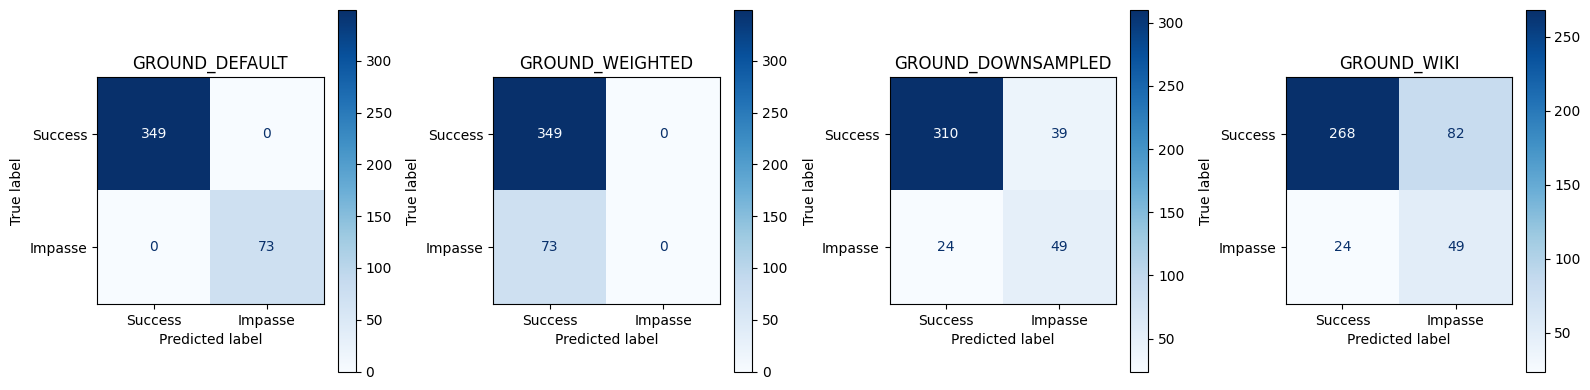

<Figure size 640x480 with 0 Axes>

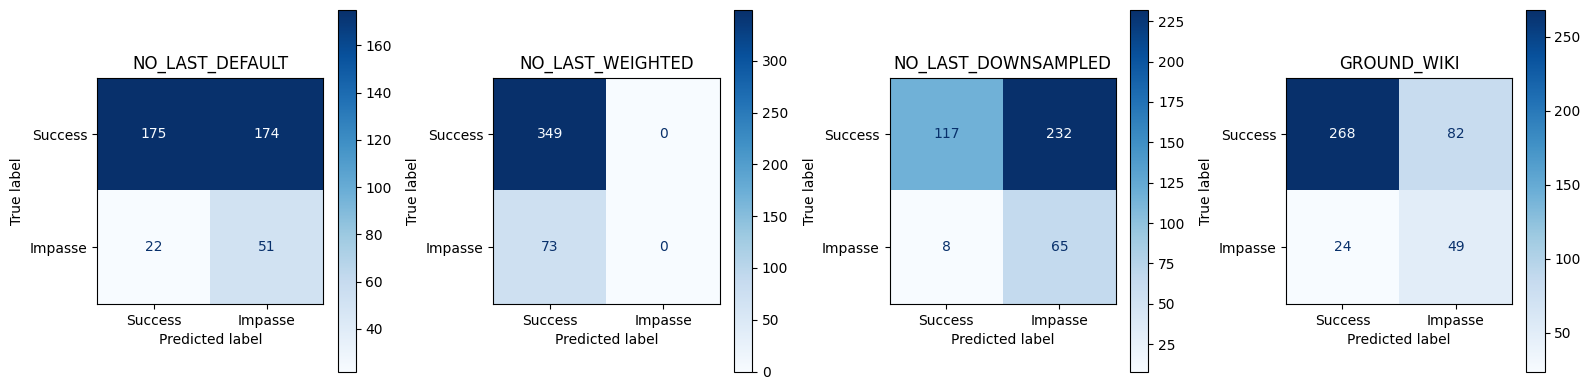

<Figure size 640x480 with 0 Axes>

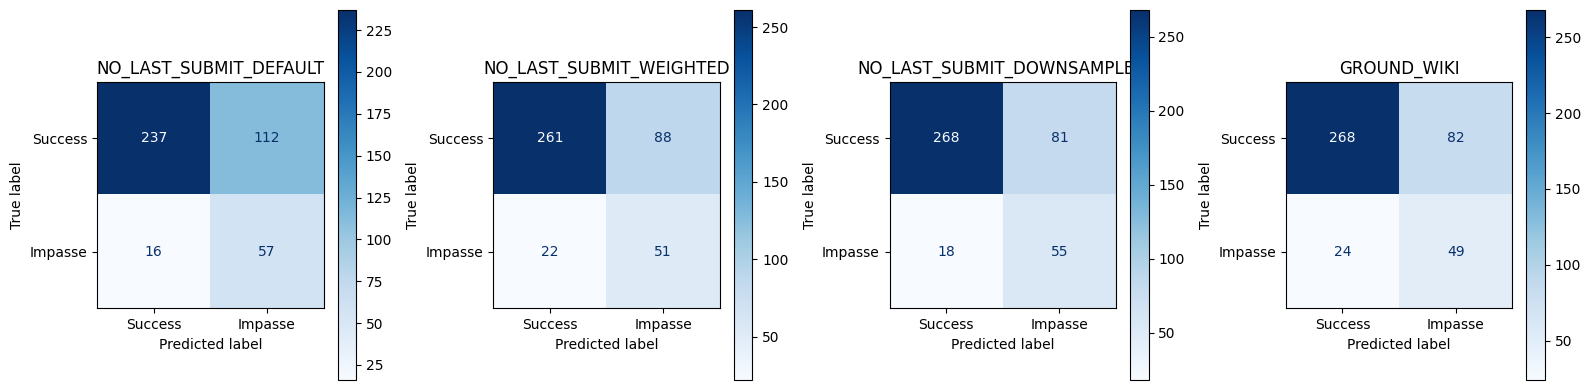

<Figure size 640x480 with 0 Axes>

In [24]:
allmetrics = {}
allmetrics.update(ground_metrics)
allmetrics.update(no_last_metrics)
allmetrics.update(no_subm_metrics)
allcorpora = {}
allcorpora.update(ground_corpora)
allcorpora.update(no_last_corpora)
allcorpora.update(no_subm_corpora)

compare_best_model_metrics(allmetrics, ground_corpora)

compare_best_model_confusion(ground_thresholds, ground_metrics, ground_corpora)
compare_best_model_confusion(no_last_thresholds, ground_metrics,  no_last_corpora)
compare_best_model_confusion( no_subm_thresholds, no_subm_metrics, no_subm_corpora)

# Differences in Distributed Probabilities 

In [68]:
all_corpora_by_downsampling_comp = [corpora_info_ground, corpora_info_no_last, corpora_info_no_subm]
all_corpora_by_utterance_comp = [corpora_info_no_sampling, corpora_info_downsampled, corpora_info_weighted]



### Model Sensitivity of Probability Forecast to Downsampling

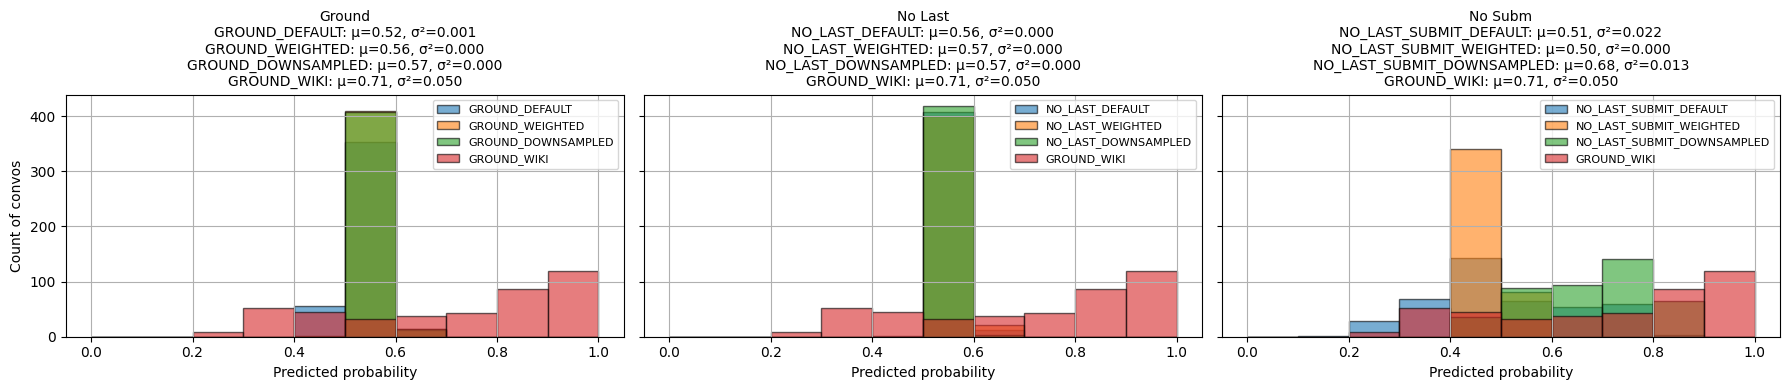

In [69]:
compare_best_model_convo_histograms(all_corpora_by_downsampling_comp, title_key=1)

### Model Sensitivity of Probability Forecast to Utterance Variability

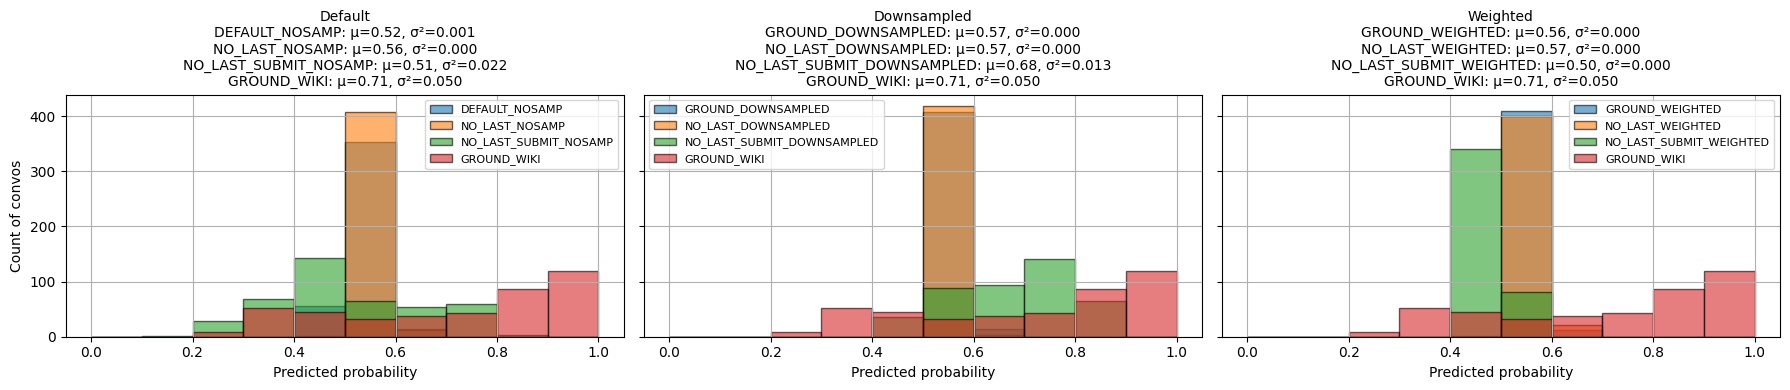

In [206]:
compare_best_model_convo_histograms(all_corpora_by_utterance_comp, title_key=0)


# Misclassified Texts Analysis: No Last Utterance No Submit with Downsampling

In [25]:

no_last_downsampled_mispred = Corpus(filename='/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/downsampled_run/corpus_kodis_no_last_downsampled')
no_last_downsampled_mispred = no_last_downsampled_mispred.filter_conversations_by(selector= convo_selector)
apply_best_threshold(no_last_downsampled_mispred, threshold=0.5597192049026489)
no_last_downsampled_mispred= no_last_downsampled_mispred.filter_conversations_by(
    lambda convo: convo.meta.get("best_forecast") != convo.meta.get("label"))

no_last_downsampled_true = Corpus(filename='/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/downsampled_run/corpus_kodis_no_last_downsampled')
no_last_downsampled_true = no_last_downsampled_true.filter_conversations_by(selector= convo_selector)
apply_best_threshold(no_last_downsampled_true, threshold=0.5597192049026489)
no_last_downsampled_true= no_last_downsampled_true.filter_conversations_by(
    lambda convo: convo.meta.get("best_forecast") == convo.meta.get("label"))


In [26]:
display(no_last_downsampled_mispred.get_utterances_dataframe())
display(no_last_downsampled_true.get_utterances_dataframe())

,timestamp,text,speaker,reply_to,conversation_id,meta.craft_tokens,meta.prediction,meta.pred_score,meta.best_prediction,vectors
id,,,,,,,,,,
utt0_con6,1699389969,Hello. I need you to make this right. This is ...,Buyer_6,None,utt0_con6,"[hello, ., i, need, you, to, make, this, right...",1.0,0.508345,0,[]
utt1_con6,1699389993,can you explain the problem with the product?,Seller_6,utt0_con6,utt0_con6,"[can, you, explain, the, problem, with, the, p...",1.0,0.516136,0,[]
utt2_con6,1699390064,Sorry. Guess i should have started with that. ...,Buyer_6,utt1_con6,utt0_con6,"[sorry, ., guess, i, should, have, started, wi...",1.0,0.524323,0,[]
utt3_con6,1699390107,the website clearly states that this is a cham...,Seller_6,utt2_con6,utt0_con6,"[the, website, clearly, states, that, this, is...",1.0,0.531394,0,[]
utt4_con6,1699390191,I have burnt by online purchase before. Therfo...,Buyer_6,utt3_con6,utt0_con6,"[i, have, burnt, by, online, purchase, before,...",1.0,0.543205,0,[]
...,...,...,...,...,...,...,...,...,...,...
utt5_con2855,1718875832,"I get it, you wanted the Kobe jersey, but our ...",Seller_2855,utt4_con2855,utt0_con2855,"[i, get, it, ,, you, wanted, the, kobe, jersey...",1.0,0.564113,1,[]
utt6_con2855,1718875983,You have to meet me halfway here. I am willing...,Buyer_2855,utt5_con2855,utt0_con2855,"[you, have, to, meet, me, halfway, here, ., i,...",1.0,0.575848,1,[]
utt7_con2855,1718876156,I understand you want a resolution. While I ca...,Seller_2855,utt6_con2855,utt0_con2855,"[i, understand, you, want, a, resolution, ., w...",1.0,0.580248,1,[]


,timestamp,text,speaker,reply_to,conversation_id,meta.craft_tokens,meta.prediction,meta.pred_score,meta.best_prediction,vectors
id,,,,,,,,,,
utt0_con55,1701299928,Hi - received a jersey I ordered from your sto...,Buyer_55,None,utt0_con55,"[hi, -, received, a, jersey, i, ordered, from,...",1.0,0.519392,0,[]
utt1_con55,1701299998,As long as you take down your terrible review ...,Seller_55,utt0_con55,utt0_con55,"[as, long, as, you, take, down, your, terrible...",1.0,0.534741,0,[]
utt2_con55,1701300062,"That seems reasonable - a refund, and I will t...",Buyer_55,utt1_con55,utt0_con55,"[that, seems, reasonable, -, a, refund, ,, and...",1.0,0.538366,0,[]
utt3_con55,1701300122,"Of course, We're both reasonable human beings,...",Seller_55,utt2_con55,utt0_con55,"[of, course, ,, we, ', re, both, reasonable, h...",1.0,0.548808,0,[]
utt4_con55,1701300171,Absolutely - apologies for the review and will...,Buyer_55,utt3_con55,utt0_con55,"[absolutely, -, apologies, for, the, review, a...",1.0,0.55096,0,[]
...,...,...,...,...,...,...,...,...,...,...
utt13_con2872,1718876680,Thank you. I will ensure that I leave a good r...,Seller_2872,utt12_con2872,utt0_con2872,"[thank, you, ., i, will, ensure, that, i, leav...",1.0,0.546009,0,[]
utt14_con2872,1718876706,"Okay, thank you.",Buyer_2872,utt13_con2872,utt0_con2872,"[okay, ,, thank, you, .]",1.0,0.552746,0,[]
utt15_con2872,1718876768,You have a good day now and I look forward to ...,Seller_2872,utt14_con2872,utt0_con2872,"[you, have, a, good, day, now, and, i, look, f...",1.0,0.552834,0,[]


### Example Misclassified Conversation

In [27]:
print_conversation(no_last_downsampled_mispred, "utt0_con67")

Buyer_67: You know the site was advertising a Kobe Bryant jersey so that's what I should be still entitled to receive.
Seller_67: Hello, I'm sorry but I think there was misunderstanding. The jersey that I was selling wasn't for any particular player.
Buyer_67: You had originally stated that it was a Bryant jersey, no one would have bought it for the second rate player that is on the jersey you set me.
Seller_67: I never stated that, nor have I ever talked to you. You simply purchased the jersey and I sent it to you. I am willing to work with you if you're that unhappy, but you have to understand where I am coming from too.
Buyer_67: The advertising stated that I know I wasn't talking to you directly are you willing to refund me for the purchase?
Seller_67: No, I can't refund you. You purchased the jersey under the listing that never stated any particular name. Are you able to review the listing again?
Buyer_67: You've conveniently altered the listing so that it indicates no specific pl

### Fighting Words Analysis Example: True Success vs. Mispredicted Success for No Last No Submit Agreement Downsampled Model

In [64]:

no_last_down_utt = no_last_downsampled_mispred.get_utterances_dataframe()[["text", "meta.pred_score"]]
threshold = 0.5597192049026489
high_confidence = no_last_down_utt[
    no_last_down_utt["meta.pred_score"] >= threshold
]
display(high_confidence)

,text,meta.pred_score
id,,
utt6_con6,I will return it but i think you should,0.563421
utt7_con6,we will be happy to refund your purchase upon ...,0.563799
utt8_con6,Ok. Im going to need a post paid label. Im sur...,0.565379
utt9_con6,"we will provide you with a return label, and r...",0.569048
utt10_con6,I have proof and your not willing to look at it.,0.578125
...,...,...
utt11_con2845,"That's great to hear, I'm glad we could discus...",0.565275
utt4_con2855,I can't accept a discount on some next order. ...,0.559989
utt5_con2855,"I get it, you wanted the Kobe jersey, but our ...",0.564113


### Fighting Words Analysis: Mispredicted True Success vs. Mispredicted True Impasse for No Last No Submit Agreement Downsampled Model

class1_func returned 3157 valid corpus components. class2_func returned 87 valid corpus components.
Vocab size is 3969
Comparing language...
ngram zscores computed.


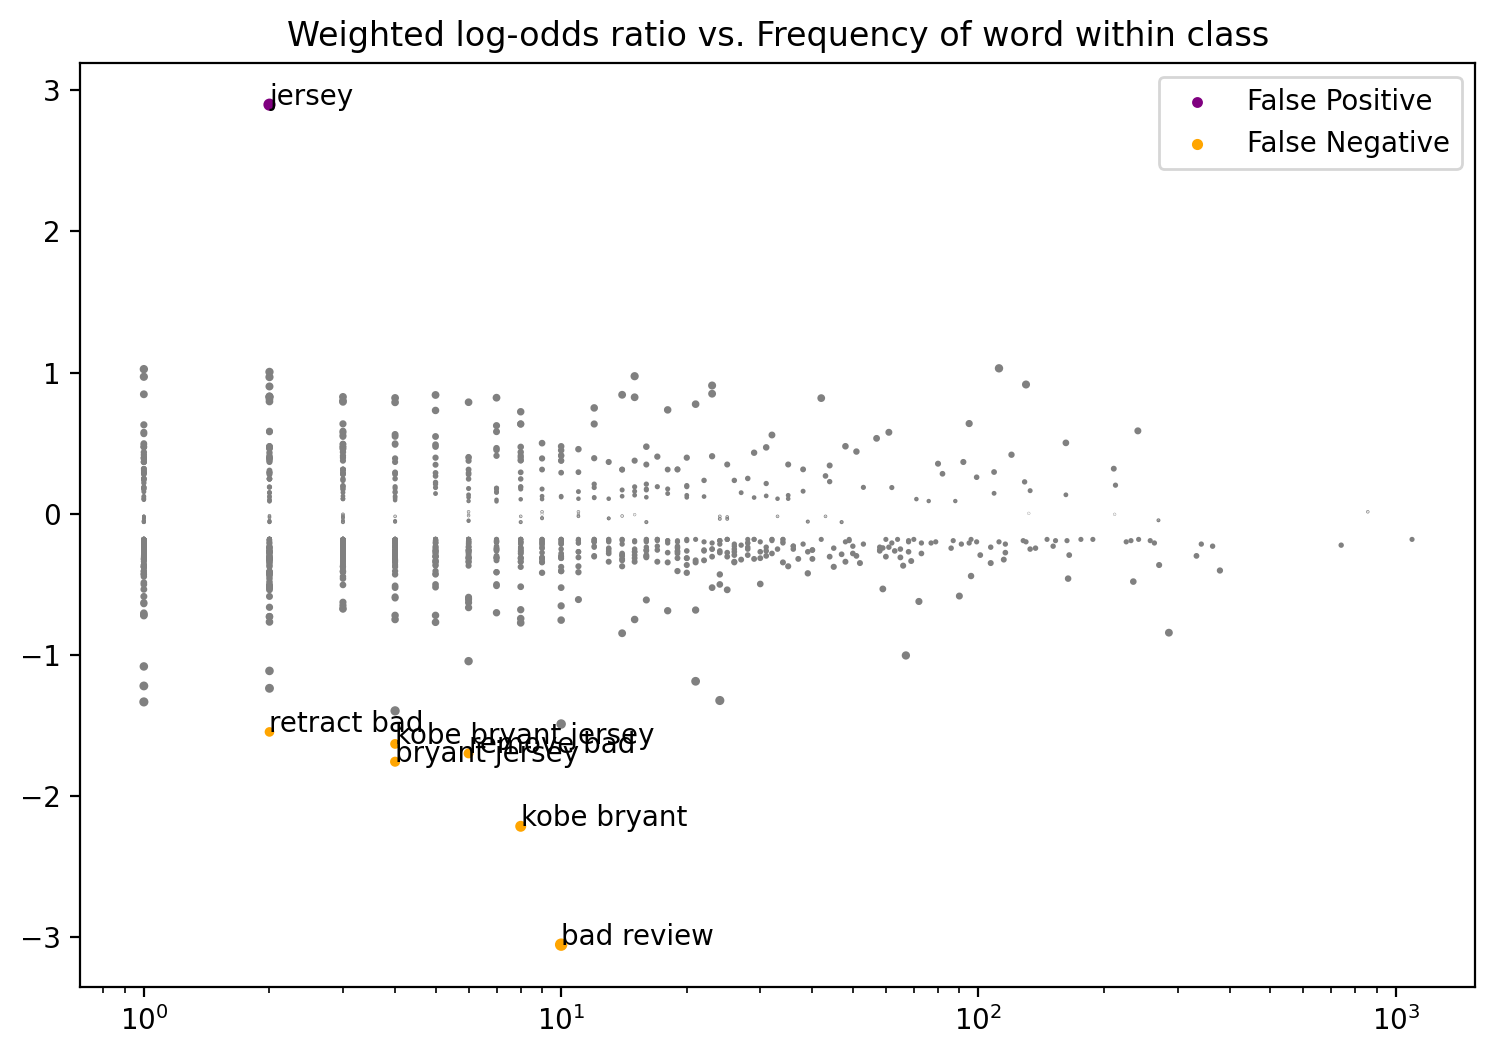

,z-score,class
ngram,,
bad review,-3.050993,False Negative
accept deal,-2.414431,False Negative
kobe bryant,-2.212873,False Negative
negative review,-2.148181,False Negative
bryant jersey,-1.755612,False Negative
partial refund,-1.748950,False Negative
remove bad,-1.696701,False Negative
kobe bryant jersey,-1.629603,False Negative
remove bad review,-1.613177,False Negative


,z-score,class
ngram,,
apologize,1.396108,False Positive
accept,1.515857,False Positive
website,1.651638,False Positive
player,1.663223,False Positive
review,1.686559,False Positive
offer,1.738561,False Positive
bryant,1.891010,False Positive
kobe,1.989253,False Positive
refund,2.659866,False Positive


In [71]:

no_last_downsampled_fr= Corpus(filename='/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/downsampled_run/corpus_kodis_no_last_downsampled')
apply_best_threshold(no_last_downsampled_fr, threshold=0.5597192049026489, selector=convo_selector)

# display(no_last_downsampled.get_utterances_dataframe()[["text", "meta.pred_score"]])
f_model, z_df= analyze_mispredicted_fighting_words(no_last_downsampled_fr, plot=True, key="false_pos_neg")
display(z_df.head(10)) 
display(z_df.tail(10))

In [72]:
f_model, z_df= analyze_mispredicted_fighting_words(no_last_downsampled_fr, plot=True, key="false_pos_neg", custom_vec = False)
display(z_df.head(10)) 
display(z_df.tail(10))

TypeError: CountVectorizer.__init__() got an unexpected keyword argument 'prior'

# Correlation with Frustration Scores

# Utility Functions

### ConvoKit Transformers

### Metric and Plotting Functions

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict, Callable
from sklearn.metrics import (
    roc_curve, roc_auc_score,
    precision_recall_curve, average_precision_score,
    ConfusionMatrixDisplay
)
from IPython.display import display
from sklearn.calibration import CalibrationDisplay

def find_best_threshold(y_true, y_score):
    """
    Return the threshold that maximizes Youden's J = TPR − FPR.
    """
    fpr, tpr, thresh = roc_curve(y_true, y_score)
    youden = tpr - fpr
    idx    = np.argmax(youden)
    return thresh[idx], tpr[idx], fpr[idx], youden[idx]


def apply_best_threshold(corpus, threshold, prob_key= "pred_score", best_pred_key= "best_prediction",
    best_label_key= "best_forecast", selector: Callable[[Conversation], bool] = lambda convo: True):
    for convo in corpus.iter_conversations(selector):
        any_pos = False
        for utt in convo.iter_utterances():
            score = utt.meta.get(prob_key, 0.0)
            pred  = int(score >= threshold)
            utt.meta[best_pred_key] = pred
            if pred:
                any_pos = True
        convo.meta[best_label_key] = int(any_pos)

def horizon(corpus: Corpus, selector: Callable[[Conversation], bool] = lambda convo: True):
        comments_until_end = {}
        for convo in corpus.iter_conversations(selector):
            if selector(convo) and convo.meta["best_forecast"] == 1:
                for i, utt in enumerate(convo.get_chronological_utterance_list()):
                    prediction = utt.meta["best_prediction"]
                    if prediction is not None and prediction > 0:
                        comments_until_end[convo.id] = (
                            len(convo.get_chronological_utterance_list()) - i
                        )
                        break
        return comments_until_end

"""Taken + modified from forecaster class"""
def summarize(corpus: Corpus, selector: Callable[[Conversation], bool] = lambda convo: True, threshold = None):
        df = corpus.get_conversations_dataframe(selector=selector)

         # counts
        tp = ((df["meta.label"]==1) & (df["meta.best_forecast"]==1)).sum()
        fp = ((df["meta.label"]==0) & (df["meta.best_forecast"]==1)).sum()
        tn = ((df["meta.label"]==0) & (df["meta.best_forecast"]==0)).sum()
        fn = ((df["meta.label"]==1) & (df["meta.best_forecast"]==0)).sum()

        # accuracy is always well‑defined
        acc = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0.0

        # precision, recall, fpr guard against zero‐denom
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        fpr       = fp / (fp + tn) if (fp + tn) > 0 else 0.0

        # F1 = 2 * (precision * recall) / (precision + recall)
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0


        return {
            "Accuracy":  acc,
            "Precision": precision,
            "Recall":    recall,
            "FPR":       fpr,
            "F1":        f1,
            "Best Threshold": threshold,}
       

def all_confusion_matrices(corpora_info):
    names, corpora, metrics_list, dfs, horizons = zip(*corpora_info)
    merged = dfs[0][['label','score','forecast']].rename(
        columns={'score':f'score_{names[0]}','forecast':f'forecast_{names[0]}'})
    for name, df in zip(names[1:], dfs[1:]):
        merged = merged.join(
            df[['score','forecast']].rename(
                columns={'score':f'score_{name}','forecast':f'forecast_{name}'}
            ), how='inner'
        )

    # 6) confusion matrices
    fig, axes = plt.subplots(1, len(names), figsize=(4*len(names),4))
    if len(names)==1: axes=[axes]
    for ax, name in zip(axes, names):
        ConfusionMatrixDisplay.from_predictions(
            y_true=merged['label'],
            y_pred=merged[f'forecast_{name}'],
            display_labels=["Success","Impasse"],
            ax=ax
        )
        ax.set_title(name)

    plt.tight_layout(); plt.show()

def compare_craft_models(corpora_info, split_key="split", train_tag="train", test_tag="test", best= None):
    """
    corpora_info: list of (name, Corpus, metrics_dict, conv_df, horizon_dict)
    """
    names, corpora, metrics_list, dfs, horizons = zip(*corpora_info)

    # 1) avg lengths
    print("== Avg. Conversation Length ==")
    for name, corpus in zip(names, corpora):
        train_lens = [
            len(conv.get_utterance_ids())
            for conv in corpus.iter_conversations()
            if conv.meta.get(split_key)==train_tag
        ]
        test_lens  = [
            len(conv.get_utterance_ids())
            for conv in corpus.iter_conversations()
            if conv.meta.get(split_key)==test_tag
        ]
        print(f"  {name:20s}  train={np.mean(train_lens):.1f}  test={np.mean(test_lens):.1f}")
    print()

    # 2) metrics table
    print("== Conversation‑level Test Metrics ==")
    metrics_df = pd.DataFrame(metrics_list, index=names)
    display(metrics_df)

    # 3) horizon histograms
    all_vals   = np.concatenate([list(h.values()) for h in horizons])
    global_max = int(all_vals.max()) if all_vals.size else 1
    bins       = np.arange(1, global_max+2)
    fig, axes  = plt.subplots(1, len(names), figsize=(5*len(names),4), sharey=True)
    if len(names)==1: axes=[axes]
    for ax, name, hor in zip(axes, names, horizons):
        vals = np.array(list(hor.values()))
        ax.hist(vals, bins=bins, density=True, edgecolor="k")
        ax.set_title(f"{name}\nForecast Horizon")
        ax.set_xlabel("# comments after first+forecast")
        ax.set_xlim(1, global_max+1)
        if ax is axes[0]:
            ax.set_ylabel("Percent of convos")
        ax.text(.05,.85, f"μ={vals.mean():.1f}\nmed={np.median(vals):.1f}",
                transform=ax.transAxes, va="top", fontsize=9)
    plt.tight_layout()
    plt.show()

    # 4) merge conversation‑level dfs
    merged = dfs[0][['label','score','forecast']].rename(  
        columns={'score':f'score_{names[0]}','forecast':f'forecast_{names[0]}'})
    for name, df in zip(names[1:], dfs[1:]):
        merged = merged.join(
            df[['score','forecast']].rename(
                columns={'score':f'score_{name}','forecast':f'forecast_{name}'}
            ), how='inner'
        )

    # 5) calibration + probability histogram
    fig, (ax_cal, ax_hist) = plt.subplots(1,2, figsize=(12,4))
    for name in names:
        CalibrationDisplay.from_predictions(
            y_true=merged['label'],
            y_prob=merged[f'score_{name}'],
            n_bins=10, name=name, ax=ax_cal
        )
    ax_cal.set_title("Calibration Curves"); ax_cal.grid(True)

    bins_prob = np.linspace(0,1,11)
    for name in names:
        ax_hist.hist(merged[f'score_{name}'], bins=bins_prob,
                     alpha=0.6, label=name, edgecolor='k')
    ax_hist.set_title("Probability Histogram")
    ax_hist.set_xlabel("Predicted probability")
    ax_hist.set_ylabel("Count of convos")
    ax_hist.legend(); ax_hist.grid(True)

    plt.tight_layout(); plt.show()

    # 6) confusion matrices
    fig, axes = plt.subplots(1, len(names), figsize=(4*len(names),4))
    if len(names)==1: axes=[axes]
    for ax, name in zip(axes, names):
        ConfusionMatrixDisplay.from_predictions(
            y_true=merged['label'],
            y_pred=merged[f'forecast_{name}'],
            display_labels=["Success","Impasse"],
            ax=ax
        )
        ax.set_title(name)
    plt.tight_layout(); plt.show()

    # 7) ROC & PR curves + find best thresholds
    thresholds = {}
    metrics = {}
    corpora = {}
    plt.figure(figsize=(12,5))

    # ROC
    plt.subplot(1,2,1)
    for name in names:
        y_true = merged['label']
        y_score= merged[f'score_{name}']
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc = roc_auc_score(y_true, y_score)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
        thr, t, f, j = find_best_threshold(y_true, y_score)
        thresholds[name] = thr
        print(f"{name:20s} best thr={thr:.3f}, TPR={t:.3f}, FPR={f:.3f}, J={j:.3f}")
    plt.plot([0,1],[0,1],'k--')
    plt.title("ROC Curves"); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.legend(); plt.grid(True)

    #annotate corpora with best prediction:
    for name, corpus, *_ in corpora_info:
        if name not in thresholds:
            raise KeyError(f"No threshold provided for model {name!r}")
        apply_best_threshold(corpus, thresholds[name],  selector =lambda convo: convo.meta.get("split") == "test")
        # create best metrics
        metrics[name] = summarize(corpus, selector =lambda convo: convo.meta.get("split") == "test", threshold=thresholds[name])
        corpora[name] = corpus


    # PR
    plt.subplot(1,2,2)
    for name in names:
        prec, rec, _ = precision_recall_curve(merged['label'], merged[f'score_{name}'])
        ap = average_precision_score(merged['label'], merged[f'score_{name}'])
        plt.plot(rec, prec, label=f"{name} (AP={ap:.2f})")
    plt.title("Precision–Recall Curves"); plt.xlabel("Recall"); plt.ylabel("Precision")
    plt.legend(); plt.grid(True)
    plt.tight_layout(); plt.show()

    # 8) summary table
    summary = {
        f"{name}_acc":      (merged['label']==merged[f'forecast_{name}']).mean()
        for name in names
    }
    summary.update({
        f"{name}_avg_prob": merged[f'score_{name}'].mean()
        for name in names
    })
    print("== Summary of Convo Acc & Avg Prob ==")
    display(pd.DataFrame(summary, index=["conversation_level"]))

    return thresholds, metrics, corpora

def best_thersholds(corpora_info, split_key="split", train_tag="train", test_tag="test"):
     # 7) ROC & PR curves + find best thresholds
    thresholds = {}
    metrics = {}
    corpora = {}
    plt.figure(figsize=(12,5))


    for name in names:
        y_true = merged['label']
        y_score= merged[f'score_{name}']
        thr, t, f, j = find_best_threshold(y_true, y_score)
        thresholds[name] = thr


def compare_best_models(thresholds, metrics, corpora, split_key = "split", test_tag = "test"):
    names = list(corpora.keys())
    # 1) metrics table
    print("== Conversation‑level Best Threshold Test Set Metrics ==")
    metrics_df = pd.DataFrame(metrics, index=list(metrics.values())[0].keys()).T
    display(metrics_df)

    # 2) confusion matrices
    fig, axes = plt.subplots(1, len(names), figsize=(4*len(names), 4))
    if len(names)==1: axes=[axes]

    for ax, name in zip(axes, names):
        
        # collect true/test only
        conv_df = corpora[name].get_conversations_dataframe().reset_index()
        test_df = conv_df[conv_df[f"meta.{split_key}"] == test_tag]
        y_true = test_df["meta.label"].astype(int)
        y_pred = test_df["meta.best_forecast"].astype(int)
        ConfusionMatrixDisplay.from_predictions(
            y_true=y_true,
            y_pred=y_pred,
            display_labels=["Success","Impasse"],
            cmap="Blues",
            ax=ax
        )
        ax.set_title(name)
    plt.tight_layout()
    plt.show()

    # 3) forecast‑horizon histograms
    fig, axes = plt.subplots(1, len(names), figsize=(5*len(names), 4), sharey=True)
    if len(names)==1: axes=[axes]

    # compute global max horizon to align bins
    all_horizons = []
    for name in names:
        h = horizon(corpora[name], selector=lambda c: c.meta.get(split_key)==test_tag)
        all_horizons.extend(h.values())
    max_h = int(max(all_horizons)) if all_horizons else 1
    bins = np.arange(1, max_h+2)

    for ax, name in zip(axes, names):
        h = horizon(corpora[name], selector=lambda c: c.meta.get(split_key)==test_tag)
        vals = np.array(list(h.values()))
        ax.hist(vals, bins=bins, density=True, edgecolor="k")
        ax.set_title(f"{name}\nForecast Horizon")
        ax.set_xlabel("# utts after first + forecast")
        ax.set_xlim(1, max_h+1)
        if ax is axes[0]:
            ax.set_ylabel("Percent of convos")
        m, md = vals.mean() if vals.size else 0, np.median(vals) if vals.size else 0
        ax.text(.05, .85, f"μ={m:.1f}\nmed={md:.1f}",
                transform=ax.transAxes, va="top", fontsize=9)
    plt.tight_layout()
    plt.show()



def compare_best_model_confusion(thresholds, metrics, corpora, split_key = "split", test_tag = "test"):
    names = list(corpora.keys())
    # 2) confusion matrices
    fig, axes = plt.subplots(1, len(names), figsize=(4*len(names), 4))
    if len(names)==1: axes=[axes]
    for ax, name in zip(axes, names):
        # collect true/test only
        conv_df = corpora[name].get_conversations_dataframe().reset_index()
        test_df = conv_df[conv_df[f"meta.{split_key}"] == test_tag]
        y_true = test_df["meta.label"].astype(int)
        y_pred = test_df["meta.best_forecast"].astype(int)
        ConfusionMatrixDisplay.from_predictions(
            y_true=y_true,
            y_pred=y_pred,
            display_labels=["Success","Impasse"],
            cmap="Blues",
            ax=ax
        )
        ax.set_title(name)
    plt.tight_layout()
    plt.show()
    plt.tight_layout()
    plt.show()


def compare_best_model_metrics(metrics, corpora, split_key = "split", test_tag = "test"):
    names = list(corpora.keys())
    # 1) metrics table
    print("== Conversation‑level Best Threshold Test Set Metrics ==")
    metrics_df = pd.DataFrame(metrics, index=list(metrics.values())[0].keys()).T
    display(metrics_df)
    plt.show()


import numpy as np
import matplotlib.pyplot as plt


import numpy as np
import matplotlib.pyplot as plt

def compare_best_model_convo_histograms(
    groups_of_corpora_info,
    bins_prob=None,
    title_key: int = 0
):
    """
    groups_of_corpora_info: list of lists of corpora_info tuples
    bins_prob: optional bin edges for the histograms
    title_key: 0 or 1, picks one of two title‐sets
    """
    # pick the right set of group names
    if title_key == 0:
        titles = ["Default", "Downsampled", "Weighted", "Wiki"]
    else:
        titles = ["Ground", "No Last", "No Subm", "Wiki"]
    
    n_groups = len(groups_of_corpora_info)
    if bins_prob is None:
        bins_prob = np.linspace(0, 1, 11)

    fig, axes = plt.subplots(1, n_groups, figsize=(6 * n_groups, 4), sharey=True)
    if n_groups == 1:
        axes = [axes]

    for ax, corpora_info, group_title in zip(axes, groups_of_corpora_info, titles):
        # 1) unpack & merge
        names, _, _, dfs, _ = zip(*corpora_info)
        merged = dfs[0][['label', 'score', 'forecast']].rename(
            columns={'score': f'score_{names[0]}',
                     'forecast': f'forecast_{names[0]}'})
        for name, df in zip(names[1:], dfs[1:]):
            merged = merged.join(
                df[['score', 'forecast']].rename(
                    columns={'score': f'score_{name}',
                             'forecast': f'forecast_{name}'}),
                how='inner'
            )

        # 2) plot histograms
        for name in names:
            ax.hist(
                merged[f'score_{name}'],
                bins=bins_prob,
                density=False,    # raw counts
                alpha=0.6,
                label=name,
                edgecolor='k'
            )

        # 3) compute mean & variance for each model
        stats_lines = []
        for name in names:
            arr = merged[f'score_{name}'].to_numpy()
            mu  = arr.mean()
            var = arr.var()
            stats_lines.append(f"{name}: μ={mu:.2f}, σ²={var:.3f}")
        subtitle = "\n".join(stats_lines)

        # 4) format subplot
        ax.set_title(f"{group_title}\n{subtitle}", fontsize=10)
        ax.set_xlabel("Predicted probability")
        if ax is axes[0]:
            ax.set_ylabel("Count of convos")
        ax.grid(True)
        ax.legend(fontsize=8)

    plt.tight_layout()
    plt.show()


### Conversation Utilities

In [28]:
def print_conversation(corpus, convo_id):
    """
    Pretty–print the dialogue for a single conversation.

    Args:
        corpus:    a ConvoKit Corpus
        convo_id:  the ID of the conversation you want to print
    """
    # grab the utterance DataFrame for that convo
    df = corpus.get_conversation(convo_id).get_utterances_dataframe()
    
    # ensure it's sorted by timestamp (or by its original index order)
    if "timestamp" in df.columns:
        df = df.sort_values("timestamp")
    
    # now print each turn
    for _, row in df.iterrows():
        speaker = row.get("speaker", "Unknown")
        text    = row.get("text", "")
        print(f"{speaker}: {text}")

### Fighting Words

In [73]:
from convokit.fighting_words.fightingWords import FightingWords
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from typing import Callable
import pandas as pd
from convokit import TextCleaner
from cleantext import clean

import re

def strip_agreement(text: str) -> str:

    patterns = [r"Submitted agreement:", r"\brefund, buyer\b", r"\breview, seller\b"]
    if not any(re.search(pat, text, flags=re.IGNORECASE) for pat in patterns):
        return text
    text = re.sub(
        r"Submitted agreement:.*?\.(\s|$)",
        "",
        text,
        flags=re.IGNORECASE,
    )
    # 2) Remove any leftover 'refund, buyer' or 'review, seller'
    text = re.sub(r"\brefund, buyer\b", "", text, flags=re.IGNORECASE)
    text = re.sub(r"\breview, seller\b", "", text, flags=re.IGNORECASE)
    # 3) Collapse multiple spaces down to one, then strip edges
    return re.sub(r"\s{2,}", " ", text).strip()


def analyze_mispredicted_fighting_words(
    corpus,
    split_key: str      = "split",
    test_tag: str       = "test",
    best_pred_key: str  = "best_forecast",
    label_key: str      = "label",
    prob_key: str       = "pred_score",
    threshold: float    = None,
    custom_vec          = True,
    plot: bool          = True,
    ngram_range=(1,3),
    min_df=10,
    max_df=0.5,
    max_features=15000,
    prior=0.1,
    key: str            = "false_pos_neg"
):
    """
    Identify “fighting words” that distinguish mis‐predicted success vs mis‐predicted impasse
    at the utterance level, optionally filtered by a probability threshold.
    """
    # Define text preprocessor
    def preprocess(text: str) -> str:
        s = strip_agreement(text)
        return FightingWords.clean_text(s)

    # Define misprediction types
    def is_pos(u):
        return True if threshold is None else u.meta.get(prob_key, 0.0) >= threshold
    def is_neg(u):
        return True if threshold is None else u.meta.get(prob_key, 0.0) < threshold

    def false_pos(utt):
        c = utt.get_conversation().meta
        return c.get(split_key)==test_tag and c.get(best_pred_key)==1 and c.get(label_key)==0 and is_pos(utt)
    def false_neg(utt):
        c = utt.get_conversation().meta
        return c.get(split_key)==test_tag and c.get(best_pred_key)==0 and c.get(label_key)==1 and is_neg(utt)
    def true_pos(utt):
        c = utt.get_conversation().meta
        return c.get(split_key)==test_tag and c.get(best_pred_key)==1 and c.get(label_key)==1 and is_pos(utt)
    def true_neg(utt):
        c = utt.get_conversation().meta
        return c.get(split_key)==test_tag and c.get(best_pred_key)==0 and c.get(label_key)==0 and is_neg(utt)

    # Map key to class functions and labels
    if key == "false_pos_neg":
        class1_func, class2_func = false_pos, false_neg
        class1_label, class2_label = "False Positive", "False Negative"
    elif key == "true_pos_neg":
        class1_func, class2_func = true_pos, true_neg
        class1_label, class2_label = "True Positive", "True Negative"
    elif key == "true_false_pos":
        class1_func, class2_func = true_pos, false_pos
        class1_label, class2_label = "True Positive", "False Positive"
    elif key == "true_false_neg":
        class1_func, class2_func = true_neg, false_pos
        class1_label, class2_label = "True Negative", "False Positive"
    else:
        raise ValueError(f"Unknown key {key!r}")

    if custom_vec:
    # Build & freeze CountVectorizer on full corpus
        cv_custom = CountVectorizer(
            preprocessor=preprocess,
            stop_words='english',
            min_df=min_df,
            max_df=max_df,
            ngram_range=ngram_range,
            max_features=max_features
        )
        all_texts = [u.text for u in corpus.iter_utterances()]
        cv_custom.fit(all_texts)
        prior_counts = cv_custom.transform(all_texts).toarray().sum(axis=0)
        cv_locked = CountVectorizer(vocabulary=cv_custom.vocabulary_, preprocessor=preprocess)
        # Instantiate and fit FightingWords
        fw = FightingWords(
            text_func=lambda utt: preprocess(utt.text),
            cv=cv_locked,
            prior=prior_counts
        )
    else:
        cv= CountVectorizer(
            min_df=min_df,
            max_df=max_df,
            ngram_range=ngram_range,
            max_features=max_features,
         )
        fw = FightingWords(
            text_func=lambda utt: preprocess(utt.text),
            obj_type="utterance",
            ngram_range=ngram_range,
            cv= cv,
            prior= prior
        )
    

    fw.fit(corpus, class1_func=class1_func, class2_func=class2_func,
            selector=lambda utt: utt.get_conversation().meta.get(split_key)==test_tag)

    # Extract z‐scores with dynamic labels
    zdf = fw.get_ngram_zscores(class1_name=class1_label, class2_name=class2_label)

    # Plot if needed
    if plot:
        cfg = {"annot_method":"top_k", "top_k":10}
        fw.plot_fighting_words(
            max_label_size=12,
            class1_name=class1_label,
            class2_name=class2_label,
            config=cfg
        )

    return fw, zdf


### Forecasting Trends

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict


def plot_position_score_evolution_by_outcome(
    corpus, split_key="split", test_tag="test",
    prob_key="pred_score", name=None
):
    pos_scores = {0: defaultdict(list), 1: defaultdict(list)}
    for convo in corpus.iter_conversations():
        if convo.meta.get(split_key) != test_tag:
            continue
        lbl = convo.meta.get("label")
        for p, utt in enumerate(convo.iter_utterances(), start=1):
            score = utt.meta.get(prob_key)
            if score is not None:
                pos_scores[lbl][p].append(score)

    overall_max_pos = max(
        max(d.keys()) for d in pos_scores.values() if d
    ) if any(pos_scores.values()) else 0

    fig = plt.figure(figsize=(14, 6))
    fig.subplots_adjust(left=0.05, right=0.80, wspace=0.3)

    for ix, lbl in enumerate((0, 1), start=1):
        ax = fig.add_subplot(1, 2, ix, projection='3d')

        X = np.arange(1, overall_max_pos + 1)
        Y = [
            np.mean(pos_scores[lbl].get(p, [])) if pos_scores[lbl].get(p)
            else 0.0
            for p in X
        ]
        Z = X

        # force colormap and scatter scale to 0→1
        sc = ax.scatter(
            X, Y, Z,
            c=Y, cmap='viridis',
            vmin=0, vmax=1,
            s=40
        )
        ax.plot(X, Y, Z, color='black', lw=2)
        ax.plot(X, Y, zs=0, zdir='z', color='gray', ls='--', lw=1)
        for xi, yi, zi in zip(X, Y, Z):
            ax.plot([xi, xi], [yi, yi], [0, zi],
                    color='gray', alpha=0.3, lw=0.5)

        ax.set_xlabel("Utterance Position")
        ax.set_ylabel("Mean Predicted Probability")
        ax.set_zlabel("Conversation Length so far")
        ax.set_ylim(0, 1)                      # <— lock the probability axis
        title_lbl = "Successful" if lbl == 0 else "Impasse"
        ax.set_title(f"{title_lbl} (label={lbl})")

    # add colorbar to its own axes on the far right
    cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
    cb = fig.colorbar(sc, cax=cbar_ax)
    cb.set_label("Avg. Probability")

    if name:
        fig.suptitle(
            f"Evolution of Model Confidence by Turn for {name}",
            y=0.95, fontsize=14
        )

    plt.show()

### Wiki Ground Functions

In [5]:
filepath = "/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/preprocessed_dyads.csv"
filepath_no_last = '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convos_exclude_last_utt.csv'
filepath_no_submit_last = '/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/convos_exclude_submit_and_last.csv'

results_filepath_no_samp = Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/nosampling/")
results_filepath_no_samp_weighted = Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/nosampling_weighted/")
results_filepath_downsampled = Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/downsampled/")

def add_convo_labels(corpus, final_data):
    for idx, row in final_data.getDataframe().iterrows():
        convo_id = f"utt0_con{idx}"  # generate conversation_id format from index
        label = row["dispute_outcome"]  # update if your label column is named differently
        if convo_id in corpus.conversations:
            corpus.get_conversation(convo_id).meta["label"] = label

def corpus_train_test_split(corpus):

    # Set random seed for reproducibility
    random.seed(42)

    # 1. Get all conversation IDs
    all_convo_ids = list(corpus.get_conversation_ids())

    # 2. Shuffle the conversation IDs
    random.shuffle(all_convo_ids)

    # 3. Define proportions
    n_total = len(all_convo_ids)
    n_train = int(0.7 * n_total)
    n_val = int(0.1 * n_total)
    n_test = n_total - n_train - n_val  # ensures 100% total

    # 4. Split into train/val/test
    train_convos = all_convo_ids[:n_train]
    val_convos = all_convo_ids[n_train:n_train+n_val]
    test_convos = all_convo_ids[n_train+n_val:]


    # 5. Mark conversations with a split tag
    for convo_id in train_convos:
        corpus.get_conversation(convo_id).meta["split"] = "train"
    for convo_id in val_convos:
        corpus.get_conversation(convo_id).meta["split"] = "val"
    for convo_id in test_convos:
        corpus.get_conversation(convo_id).meta["split"] = "test"

def fit_selector(context_tuple, split):
    """
    Select only contexts in the given split, at the end of the conversation,
    and skip any utterance that’s been tagged exclude=True.
    """
    # only keep the desired split
    matches_split = (
        context_tuple.current_utterance
            .get_conversation()
            .meta["split"]
        == split
    )
    # only keep the final context in each convo
    is_end = (len(context_tuple.future_context) == 0)
    # # skip if the current utterance was marked exclude=True
    # not_excluded = not context_tuple.current_utterance.meta.get("exclude", False)

    return matches_split and is_end 

def transform_selector(context_tuple):
    """
    For transform we only need to check that the conversation is in the test split
    """
    return (context_tuple.current_utterance.get_conversation().meta["split"] == "test")


# selector for summarize: takes a Conversation
def convo_selector(convo: Conversation):
    return convo.meta.get("split") == "test"




""" CRAFT MODEL INSTANCES """
model_wiki = CRAFTModel(
    initial_weights= "craft-wiki-finetuned",  # or "craft-wiki-finetuned"
    torch_device="cuda" if torch.cuda.is_available() else "cpu"
)


""" FORECASTER MODEL INSTANCE """
forecaster_kodis_wiki = Forecaster(
    forecaster_model= model_wiki,
    labeler="label",  # uses conversation.meta["label"]
    forecast_attribute_name="prediction",
    forecast_prob_attribute_name="pred_score"
)


Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'


Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'


Row Index not in columns


/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/src/modules/DataPreprocesser.py:111: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1702723625' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.utterancesDF.loc[13988, 'timestamp']= '1702723625'
27498it [00:01, 22699.92it/s]
25391it [00:00, 70088.95it/s]
23117it [00:00, 28601.33it/s]


Processed 5524 context tuples for model evaluation
Loading saved parameters...
Building encoders, decoder, and classifier...
Models built and ready to go!
Iteration: 1; Percent complete: 1.1%
Iteration: 2; Percent complete: 2.3%
Iteration: 3; Percent complete: 3.4%
Iteration: 4; Percent complete: 4.6%
Iteration: 5; Percent complete: 5.7%
Iteration: 6; Percent complete: 6.9%
Iteration: 7; Percent complete: 8.0%
Iteration: 8; Percent complete: 9.2%
Iteration: 9; Percent complete: 10.3%
Iteration: 10; Percent complete: 11.5%
Iteration: 11; Percent complete: 12.6%
Iteration: 12; Percent complete: 13.8%
Iteration: 13; Percent complete: 14.9%
Iteration: 14; Percent complete: 16.1%
Iteration: 15; Percent complete: 17.2%
Iteration: 16; Percent complete: 18.4%
Iteration: 17; Percent complete: 19.5%
Iteration: 18; Percent complete: 20.7%
Iteration: 19; Percent complete: 21.8%
Iteration: 20; Percent complete: 23.0%
Iteration: 21; Percent complete: 24.1%
Iteration: 22; Percent complete: 25.3%
Iter

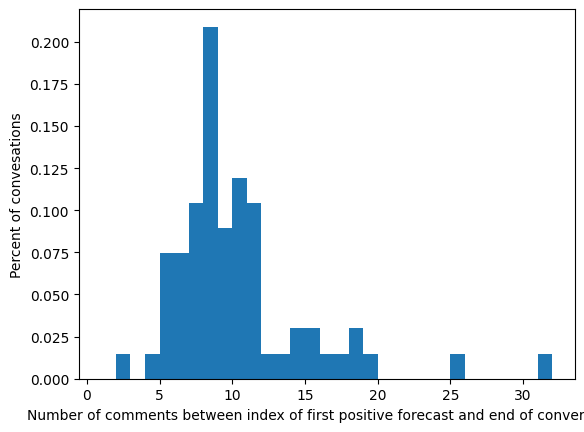

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 10.191176470588236, Median = 9.0


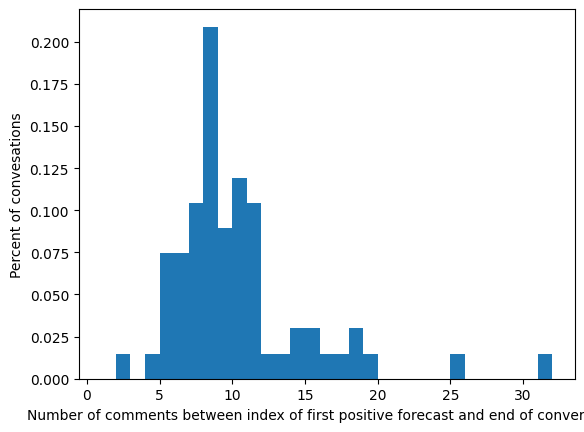

Processed 5101 context tuples for model evaluation
Loading saved parameters...
Building encoders, decoder, and classifier...
Models built and ready to go!
Iteration: 1; Percent complete: 1.2%
Iteration: 2; Percent complete: 2.5%
Iteration: 3; Percent complete: 3.8%
Iteration: 4; Percent complete: 5.0%
Iteration: 5; Percent complete: 6.2%
Iteration: 6; Percent complete: 7.5%
Iteration: 7; Percent complete: 8.8%
Iteration: 8; Percent complete: 10.0%
Iteration: 9; Percent complete: 11.2%
Iteration: 10; Percent complete: 12.5%
Iteration: 11; Percent complete: 13.8%
Iteration: 12; Percent complete: 15.0%
Iteration: 13; Percent complete: 16.2%
Iteration: 14; Percent complete: 17.5%
Iteration: 15; Percent complete: 18.8%
Iteration: 16; Percent complete: 20.0%
Iteration: 17; Percent complete: 21.2%
Iteration: 18; Percent complete: 22.5%
Iteration: 19; Percent complete: 23.8%
Iteration: 20; Percent complete: 25.0%
Iteration: 21; Percent complete: 26.2%
Iteration: 22; Percent complete: 27.5%
Ite

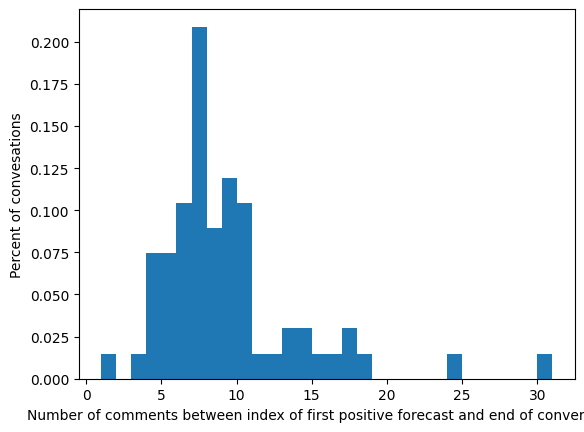

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 9.191176470588236, Median = 8.0


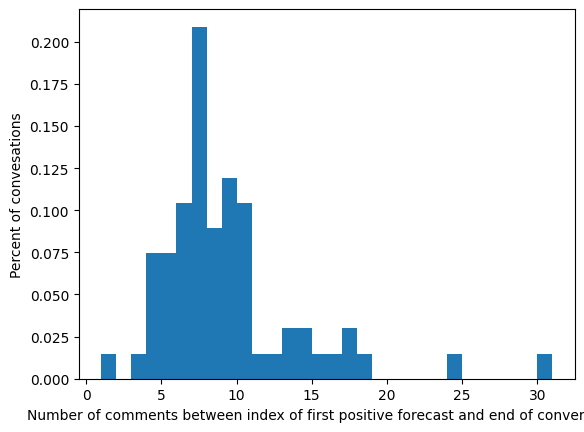

Processed 4656 context tuples for model evaluation
Loading saved parameters...
Building encoders, decoder, and classifier...
Models built and ready to go!
Iteration: 1; Percent complete: 1.4%
Iteration: 2; Percent complete: 2.7%
Iteration: 3; Percent complete: 4.1%
Iteration: 4; Percent complete: 5.5%
Iteration: 5; Percent complete: 6.8%
Iteration: 6; Percent complete: 8.2%
Iteration: 7; Percent complete: 9.6%
Iteration: 8; Percent complete: 11.0%
Iteration: 9; Percent complete: 12.3%
Iteration: 10; Percent complete: 13.7%
Iteration: 11; Percent complete: 15.1%
Iteration: 12; Percent complete: 16.4%
Iteration: 13; Percent complete: 17.8%
Iteration: 14; Percent complete: 19.2%
Iteration: 15; Percent complete: 20.5%
Iteration: 16; Percent complete: 21.9%
Iteration: 17; Percent complete: 23.3%
Iteration: 18; Percent complete: 24.7%
Iteration: 19; Percent complete: 26.0%
Iteration: 20; Percent complete: 27.4%
Iteration: 21; Percent complete: 28.8%
Iteration: 22; Percent complete: 30.1%
Ite

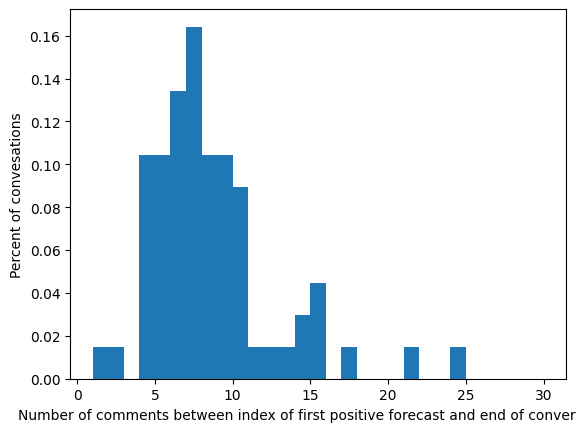

Horizon statistics (# of comments between first positive forecast and conversation end):
Mean = 8.5, Median = 7.0


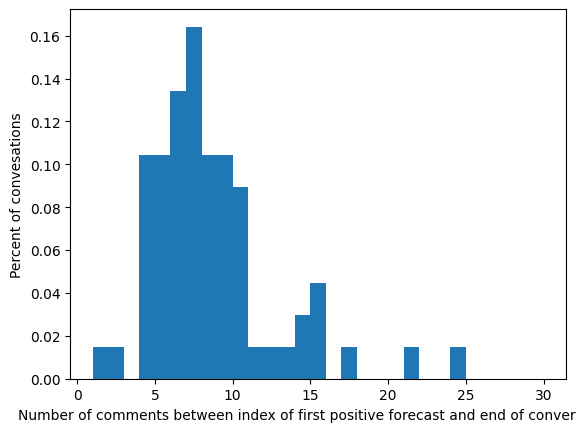

In [18]:

final_data = DataPreprocesser(filepath)
final_data_no_last = DataPreprocesser(filepath_no_last)
final_data_no_submit_last = DataPreprocesser(filepath_no_submit_last)

""" New Testing Corpus """
ground1 = corp.corpusBuilder(final_data) 
ground2= corp.corpusBuilder(final_data_no_last)
ground3=corp.corpusBuilder(final_data_no_submit_last)
add_convo_labels(ground1, final_data)
add_convo_labels(ground2, final_data)
add_convo_labels(ground3, final_data)
corpus_train_test_split(ground1)
corpus_train_test_split(ground2)
corpus_train_test_split(ground3)
"""Testing"""
corpus_kodis_ground_orig = forecaster_kodis_wiki.transform(ground1, transform_selector)
ground_wiki_df, ground_wiki_metrics = forecaster_kodis_wiki.summarize(corpus_kodis_ground_orig, convo_selector)
ground_wiki_horizon =forecaster_kodis_wiki._draw_horizon_plot(corpus_kodis_ground_orig, convo_selector)

corpus_kodis_ground_nl = forecaster_kodis_wiki.transform(ground2, transform_selector)
no_last_wiki_df, no_last_wiki_metrics = forecaster_kodis_wiki.summarize(corpus_kodis_ground_nl , convo_selector)
no_last_wiki_horizon = forecaster_kodis_wiki._draw_horizon_plot(corpus_kodis_ground_nl, convo_selector)

corpus_kodis_ground_nls = forecaster_kodis_wiki.transform(ground3, transform_selector)
no_last_submit_wiki_df, no_last_submit_wiki_metrics = forecaster_kodis_wiki.summarize(corpus_kodis_ground_nls,convo_selector)
no_last_submit_horizon = forecaster_kodis_wiki._draw_horizon_plot(corpus_kodis_ground_nls, convo_selector)

### Loading Artifacts Utilities

In [16]:
downpath =Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/downsampled_run")
defaultpath =Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/nosampling_run")
weights_path = Path("/Users/mishkin/Desktop/Research/Convo_Kit/ConvoKit_Disputes/data/fine_tuning_results/weighted_run")
#/work/data/fine_tuning_results/nosampling/run_20250509_090059/corpus_kodis_ground_default

def load_artifact(exp_dir: Path, name: str):
    p = exp_dir / name
    if (p.with_suffix('.json')).exists():
        return json.loads((p.with_suffix('.json')).read_text())
    if (p.with_suffix('.csv')).exists():
        return pd.read_csv(p.with_suffix('.csv'))
    if p.is_dir():
        return Corpus(filename= str(p))
    if (p.with_suffix('.pt')).exists():
        return torch.load(p.with_suffix('.pt'))
    raise FileNotFoundError(f"No artifact {name} in {exp_dir}")

def load_all_variants(exp_dir: Path):
    # detect which naming scheme this folder uses
    if (exp_dir / "corpus_kodis_ground_downsampled").is_dir():
        variant = "downsampled"
    elif (exp_dir / "corpus_kodis_ground_weighted_loss").is_dir():
        variant = "weighted"
    else:
        variant = "default"

    # build name‐templates
    tpl = {
        "downsampled": {
            "ground_corpus":   "corpus_kodis_ground_downsampled",
            "ground_df":       "ground_downsampled_conv_df",
            "ground_metrics":  "ground_downsampled_metrics",
            "ground_horizon":  "ground_horizon_utterances",
            # "ground_chkpt":    "ground_downsampled",

            "no_last_corpus":  "corpus_kodis_no_last_downsampled",
            "no_last_df":      "nolast_downsampled_conv_df",
            "no_last_metrics": "no_last_downsampled_metrics",
            "no_last_horizon": "no_last_horizon_utterances",
            # "no_last_chkpt":   "no_last_downsampled",

            "no_subm_corpus":  "corpus_kodis_no_last_submit_downsampled",
            "no_subm_df":      "no_submit_last_downsampled_conv_df",
            "no_subm_metrics": "no_last_submit_downsampled_metrics",
            "no_subm_horizon": "no_last_submit_horizon_utterances",
            # "no_subm_chkpt":   "no_submit_last_downsampled",
        },
        "weighted": {
            "ground_corpus":   "corpus_kodis_ground_weighted_loss",
            "ground_df":       "ground_weight_conv_df",
            "ground_metrics":  "ground_weighted_metrics",
            "ground_horizon":  "ground_weight_horizon",
            # "ground_chkpt":    "ground_weighted",

            "no_last_corpus":  "corpus_kodis_no_last_weighted_loss",
            "no_last_df":      "nolast_weight_conv_df",
            "no_last_metrics": "no_last_weighted_metrics",
            "no_last_horizon": "no_last_weight_horizon",
            # "no_last_chkpt":   "no_last_weighted",

            "no_subm_corpus":  "corpus_kodis_no_submit_weighted_loss",
            "no_subm_df":      "no_submit_last_weight_conv_df",
            "no_subm_metrics": "no_last_submit_weighted_metrics",
            "no_subm_horizon": "no_last_submit_weight_horizon",
            # "no_subm_chkpt":   "no_submit_last_weighted",
        },
        "default": {
            "ground_corpus":   "corpus_kodis_ground_default",
            "ground_df":       "ground_conv_default_df",
            "ground_metrics":  "ground_default_metrics",
            "ground_horizon":  "ground_default_horizon",
            # "ground_chkpt":    "ground_default",

            "no_last_corpus":  "corpus_kodis_no_last_default",
            "no_last_df":      "no_last_conv_df_default",
            "no_last_metrics": "no_last_default_metrics",
            "no_last_horizon": "no_last_default_horizon",
            # "no_last_chkpt":   "no_last_default",

            "no_subm_corpus":  "corpus_kodis_no_submit_last_default",
            "no_subm_df":      "no_last_submit_conv_default_df",
            "no_subm_metrics": "no_last_submit_default_metrics",
            "no_subm_horizon": "no_last_submit_default_horizon",
            # "no_subm_chkpt":   "no_last_submit_last_default",
        },
    }[variant]

    return {
        key: load_artifact(exp_dir, fname)
        for key, fname in tpl.items()
    }


# Now load each regime:
down = load_all_variants(downpath)
no_samp = load_all_variants(defaultpath)
wt = load_all_variants(weights_path)

### Load Artifacts

In [21]:
wiki ={}
wiki["ground_corpus"] = corpus_kodis_ground_orig
wiki["ground_metrics"] = ground_wiki_metrics
wiki["ground_df"] =  ground_wiki_df
wiki["ground_horizon"] = ground_wiki_horizon

wiki["no_last_corpus"] = corpus_kodis_ground_nl
wiki["no_last_metrics"] = no_last_wiki_metrics
wiki["no_last_df"] =  no_last_wiki_df
wiki["no_last_horizon"] = no_last_wiki_horizon

wiki["no_last_submit_corpus"] = corpus_kodis_ground_nls
wiki["no_last_submit_metrics"] = no_last_submit_wiki_metrics
wiki["no_last_submit_df"] =  no_last_submit_wiki_df
wiki["no_last_submit_horizon"] = no_last_submit_horizon

wiki["ground_df"] = wiki["ground_df"].reset_index(drop=True)
wiki["no_last_df"] = wiki["no_last_df"].reset_index(drop=True)
wiki["no_last_submit_df"] = wiki["no_last_submit_df"].reset_index(drop=True)



corpora_info_ground = [
    (
        "GROUND_DEFAULT",
        no_samp   ["ground_corpus"],
        no_samp   ["ground_metrics"],
        no_samp   ["ground_df"],
        no_samp   ["ground_horizon"],
    ),
    (
        "GROUND_WEIGHTED",
        wt        ["ground_corpus"],
        wt        ["ground_metrics"],
        wt        ["ground_df"],
        wt        ["ground_horizon"],
    ),
    (
        "GROUND_DOWNSAMPLED",
        down      ["ground_corpus"],
        down      ["ground_metrics"],
        down      ["ground_df"],
        down      ["ground_horizon"],
    ),
    (
        "GROUND_WIKI",
        wiki      ["ground_corpus"],
        wiki      ["ground_metrics"],
        wiki      ["ground_df"],
        wiki      ["ground_horizon"],
    )
]

corpora_info_no_last = [
    (
        "NO_LAST_DEFAULT",
        no_samp["no_last_corpus"],
        no_samp["no_last_metrics"],
        no_samp["no_last_df"],
        no_samp["no_last_horizon"],
    ),
    (
        "NO_LAST_WEIGHTED",
        wt["no_last_corpus"],
        wt["no_last_metrics"],
        wt["no_last_df"],
        wt["no_last_horizon"],
    ),
    (
        "NO_LAST_DOWNSAMPLED",
        down["no_last_corpus"],
        down["no_last_metrics"],
        down["no_last_df"],
        down["no_last_horizon"],
    ),
    (
        "GROUND_WIKI",
        wiki      ["ground_corpus"],
        wiki      ["ground_metrics"],
        wiki      ["ground_df"],
        wiki      ["ground_horizon"],
    )
]


corpora_info_no_subm = [
    (
        "NO_LAST_SUBMIT_DEFAULT",
        no_samp["no_subm_corpus"],
        no_samp["no_subm_metrics"],
        no_samp["no_subm_df"],
        no_samp["no_subm_horizon"],
    ),
    (
        "NO_LAST_SUBMIT_WEIGHTED",
        wt["no_subm_corpus"],
        wt["no_subm_metrics"],
        wt["no_subm_df"],
        wt["no_subm_horizon"],
    ),
    (
        "NO_LAST_SUBMIT_DOWNSAMPLED",
        down["no_subm_corpus"],
        down["no_subm_metrics"],
        down["no_subm_df"],
        down["no_subm_horizon"],
    ), (
        "GROUND_WIKI",
        wiki      ["ground_corpus"],
        wiki      ["ground_metrics"],
        wiki      ["ground_df"],
        wiki      ["ground_horizon"],
    )
]

### Utterance Variants

In [22]:
corpora_info_downsampled = [
    (
        "GROUND_DOWNSAMPLED",
        down["ground_corpus"],
        down["ground_metrics"],
        down["ground_df"],
        down["ground_horizon"],
    ),
    (
        "NO_LAST_DOWNSAMPLED",
        down["no_last_corpus"],
        down["no_last_metrics"],
        down["no_last_df"],
        down["no_last_horizon"],
    ),
    (
        "NO_LAST_SUBMIT_DOWNSAMPLED",
        down["no_subm_corpus"],
        down["no_subm_metrics"],
        down["no_subm_df"],
        down["no_subm_horizon"],
    ),
    (
        "GROUND_WIKI",
        wiki      ["ground_corpus"],
        wiki      ["ground_metrics"],
        wiki      ["ground_df"],
        wiki      ["ground_horizon"],
    )
]
corpora_info_weighted = [
    (
        "GROUND_WEIGHTED",
        wt["ground_corpus"],
        wt["ground_metrics"],
        wt["ground_df"],
        wt["ground_horizon"],
    ),
    (
        "NO_LAST_WEIGHTED",
        wt["no_last_corpus"],
        wt["no_last_metrics"],
        wt["no_last_df"],
        wt["no_last_horizon"],
    ),
    (
        "NO_LAST_SUBMIT_WEIGHTED",
        wt["no_subm_corpus"],
        wt["no_subm_metrics"],
        wt["no_subm_df"],
        wt["no_subm_horizon"],
    ),
    (
        "GROUND_WIKI",
        wiki      ["ground_corpus"],
        wiki      ["ground_metrics"],
        wiki      ["ground_df"],
        wiki      ["ground_horizon"],
    )
]
corpora_info_no_sampling = [
    (
        "DEFAULT_NOSAMP",
        no_samp["ground_corpus"],
        no_samp["ground_metrics"],
        no_samp["ground_df"],
        no_samp["ground_horizon"],
    ),
    (
        "NO_LAST_NOSAMP",
        no_samp["no_last_corpus"],
        no_samp["no_last_metrics"],
        no_samp["no_last_df"],
        no_samp["no_last_horizon"],
    ),
    (
        "NO_LAST_SUBMIT_NOSAMP",
        no_samp["no_subm_corpus"],
        no_samp["no_subm_metrics"],
        no_samp["no_subm_df"],
        no_samp["no_subm_horizon"],
    ),
    (
        "GROUND_WIKI",
        wiki      ["ground_corpus"],
        wiki      ["ground_metrics"],
        wiki      ["ground_df"],
        wiki      ["ground_horizon"],
    )
]